In [77]:
from nsepy import get_history
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt  
%matplotlib inline

In [78]:
INFY = get_history(symbol="INFY", start=date(2015,1,1), end=date(2015,12,31))

In [79]:
TCS = get_history(symbol="TCS", start=date(2015,1,1), end=date(2015,12,31))

In [80]:
INFY.shape

(248, 14)

In [81]:
TCS.shape

(248, 14)

In [82]:
TCS.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,TCS,EQ,2558.25,2567.0,2567.00,2541.00,2550.00,2545.55,2548.51,183415,4.674345e+13,8002,52870,0.2883
2015-01-02,TCS,EQ,2545.55,2551.0,2590.95,2550.60,2588.40,2579.45,2568.19,462870,1.188740e+14,27585,309350,0.6683
2015-01-05,TCS,EQ,2579.45,2581.0,2599.90,2524.65,2538.10,2540.25,2563.94,877121,2.248886e+14,43234,456728,0.5207
2015-01-06,TCS,EQ,2540.25,2529.1,2529.10,2440.00,2450.05,2446.60,2466.90,1211892,2.989615e+14,84503,714306,0.5894
2015-01-07,TCS,EQ,2446.60,2470.0,2479.15,2407.45,2426.90,2417.70,2433.96,1318166,3.208362e+14,101741,886368,0.6724


In [83]:
INFY.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2015-01-01,INFY,EQ,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+13,14908,258080,0.5154
2015-01-02,INFY,EQ,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+14,54166,1249104,0.7371
2015-01-05,INFY,EQ,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+14,82694,1830962,0.7370
2015-01-06,INFY,EQ,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+14,108209,1772070,0.7332
2015-01-07,INFY,EQ,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+14,62463,1317720,0.7270


In [84]:
type(INFY)

pandas.core.frame.DataFrame

In [85]:
type(TCS)

pandas.core.frame.DataFrame

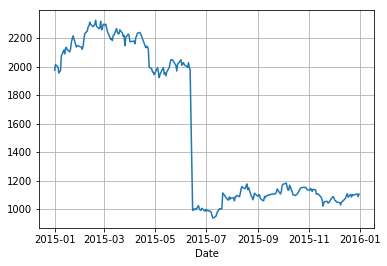

In [86]:
INFY["Close"].plot(grid = True)

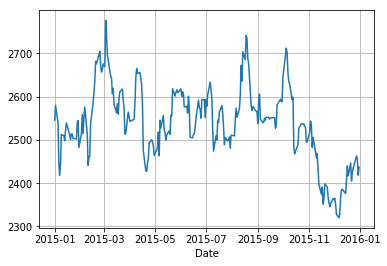

In [87]:
TCS["Close"].plot(grid = True)

In [90]:
from matplotlib.dates import DateFormatter, WeekdayLocator,DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
import matplotlib.dates as dt

In [94]:
tcs_close = TCS['Close']
infy_close = INFY['Close']

In [99]:
all_weekdays = pd.date_range(start=date(2015,1,1), end=date(2015,12,31), freq='B')

In [101]:
tcs_close = tcs_close.reindex(all_weekdays)

In [102]:
infy_close = infy_close.reindex(all_weekdays)

In [106]:
tcs_close = tcs_close.fillna(method='ffill')
infy_close = infy_close.fillna(method='ffill')

In [109]:
tcs_close.describe()

count     261.000000
mean     2537.335249
std        86.797575
min      2319.800000
25%      2495.000000
50%      2542.650000
75%      2591.500000
max      2776.000000
Name: Close, dtype: float64

In [110]:
infy_close.describe()

count     261.000000
mean     1550.464559
std       529.493461
min       937.500000
25%      1086.350000
50%      1149.400000
75%      2132.150000
max      2324.700000
Name: Close, dtype: float64

In [112]:
short_rolling_infy = infy_close.rolling(window=10).mean()
long_rolling_infy = infy_close.rolling(window=75).mean()

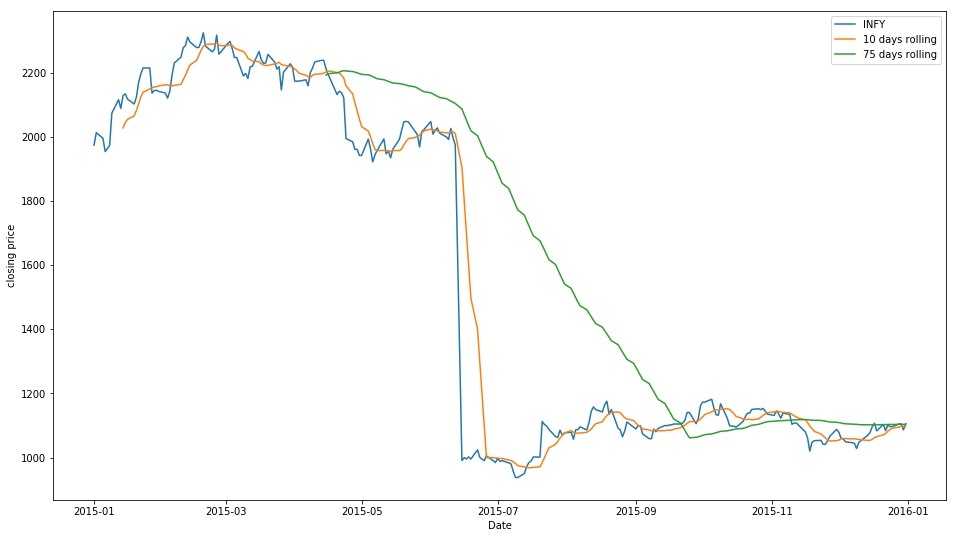

In [118]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(infy_close.index, infy_close, label='INFY')
ax.plot(short_rolling_infy.index, short_rolling_infy, label='10 days rolling')
ax.plot(long_rolling_infy.index, long_rolling_infy, label='75 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('closing price')
ax.legend()

In [115]:
short_rolling_tcs = tcs_close.rolling(window=10).mean()
long_rolling_tcs = tcs_close.rolling(window=75).mean()

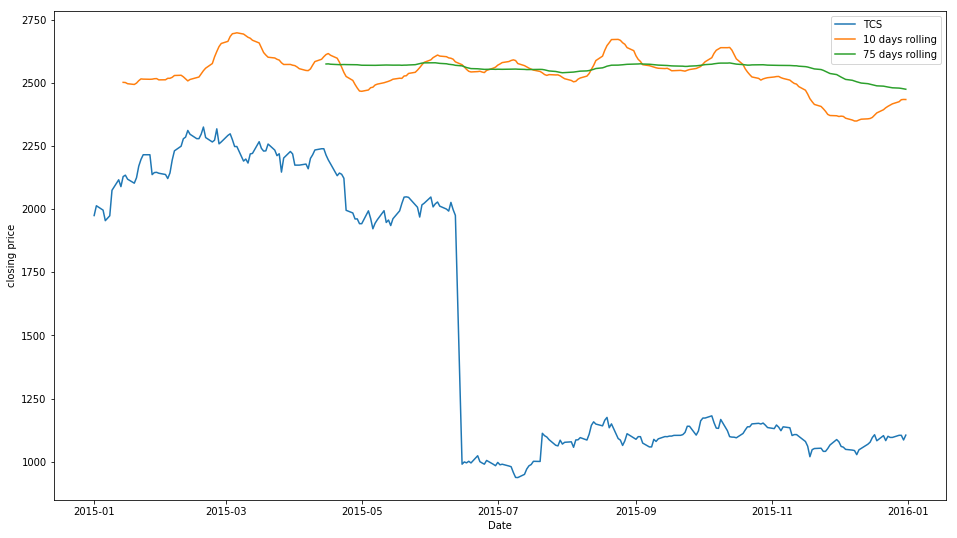

In [117]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(infy_close.index, infy_close, label='TCS')
ax.plot(short_rolling_tcs.index, short_rolling_tcs, label='10 days rolling')
ax.plot(long_rolling_tcs.index, long_rolling_tcs, label='75 days rolling')

ax.set_xlabel('Date')
ax.set_ylabel('closing price')
ax.legend()